In [1]:
# !pip install ipyfilechooser

# show the used python env
import sys
sys.executable

'c:\\Users\\m1srh\\Miniconda3\\envs\\napari_czmodel\\python.exe'

In [2]:
# import the required libraries
from czitools import pylibczirw_metadata as czimd
from czitools import pylibczirw_tools as czird
from czitools import misc, napari_tools
from ipyfilechooser import FileChooser
from IPython.display import display, HTML
import napari
from pathlib import Path
import os
import dask.array as da

In [4]:
defaultdir = os.path.join(Path(os.getcwd()).resolve().parents[1], "data")
fc = FileChooser(defaultdir)
fc.filter_pattern = '*.czi'
display(fc)

FileChooser(path='C:\Users\m1srh\Documents\Github\czitools\data', filename='', title='', show_hidden=False, se…

In [6]:
# get the complete metadata at once as one big class
mdata = czimd.CziMetadata(fc.selected)

# get only specific metadata
czi_dimensions = czimd.CziDimensions(fc.selected)
print("SizeS: ", czi_dimensions.SizeS)
print("SizeT: ", czi_dimensions.SizeT)
print("SizeZ: ", czi_dimensions.SizeZ)
print("SizeC: ", czi_dimensions.SizeC)
print("SizeY: ", czi_dimensions.SizeY)
print("SizeX: ", czi_dimensions.SizeX)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No Scene or Well information found.
SizeS:  None
SizeT:  3
SizeZ:  5
SizeC:  2
SizeY:  170
SizeX:  240


In [7]:
# return array with dimension order STZCYXA
array6d, dimstring = czird.read_6darray(fc.selected,
                                        dimorder="STZCYX",
                                        chunks_auto=False,
                                        output_dask=True,
                                        remove_Adim=True)

# remove A dimension do display the array inside Napari
dim_order, dim_index, dim_valid = czimd.CziMetadata.get_dimorder(dimstring)

No Objective Name : 'Name'
No Objective ID : 'Id'
DetectorID not found : 'Id'
DetectorName not found : 'Name'
DetectorType not found : 'Type'
Microscope System Name not found : 'System'
No Scene or Well information found.


  0%|          | 0/30 [00:00<?, ?it/s]

In [9]:
# show the dask array
array6d

dask.array<getitem, shape=(1, 3, 5, 2, 170, 240), dtype=uint16, chunksize=(1, 3, 5, 2, 170, 240), chunktype=numpy.ndarray>

In [10]:
# show array inside napari viewer
viewer = napari.Viewer()
layers = napari_tools.show(viewer, array6d, mdata,
                           dim_order=dim_order,
                           blending="additive",
                           contrast='napari_auto',
                           gamma=0.85,
                           add_mdtable=True,
                           name_sliders=True)

08-Jul-22 09:35:33 - vispy    - WARNING  - DirectWrite: CreateFontFaceFromHDC() failed (Gibt einen Fehler in einer Eingabedatei an, zum Beispiel eine Schriftartdatei.) for QFontDef(Family="8514oem", pointsize=12, pixelsize=20, styleHint=5, weight=50, stretch=100, hintingPreference=0) LOGFONT("8514oem", lfWidth=0, lfHeight=-20) dpi=144
c:\Users\m1srh\Miniconda3\envs\napari_czmodel\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


Adding Channel  : LED555
Shape Channel   : 0 (1, 3, 5, 1, 170, 240)
Scaling Factors : [1.0, 1.0, 3.533, 1.0, 1.0, 1.0]
Adding Channel  : LED470
Shape Channel   : 1 (1, 3, 5, 1, 170, 240)
Scaling Factors : [1.0, 1.0, 3.533, 1.0, 1.0, 1.0]
Rename Sliders based on the Dimension String ....


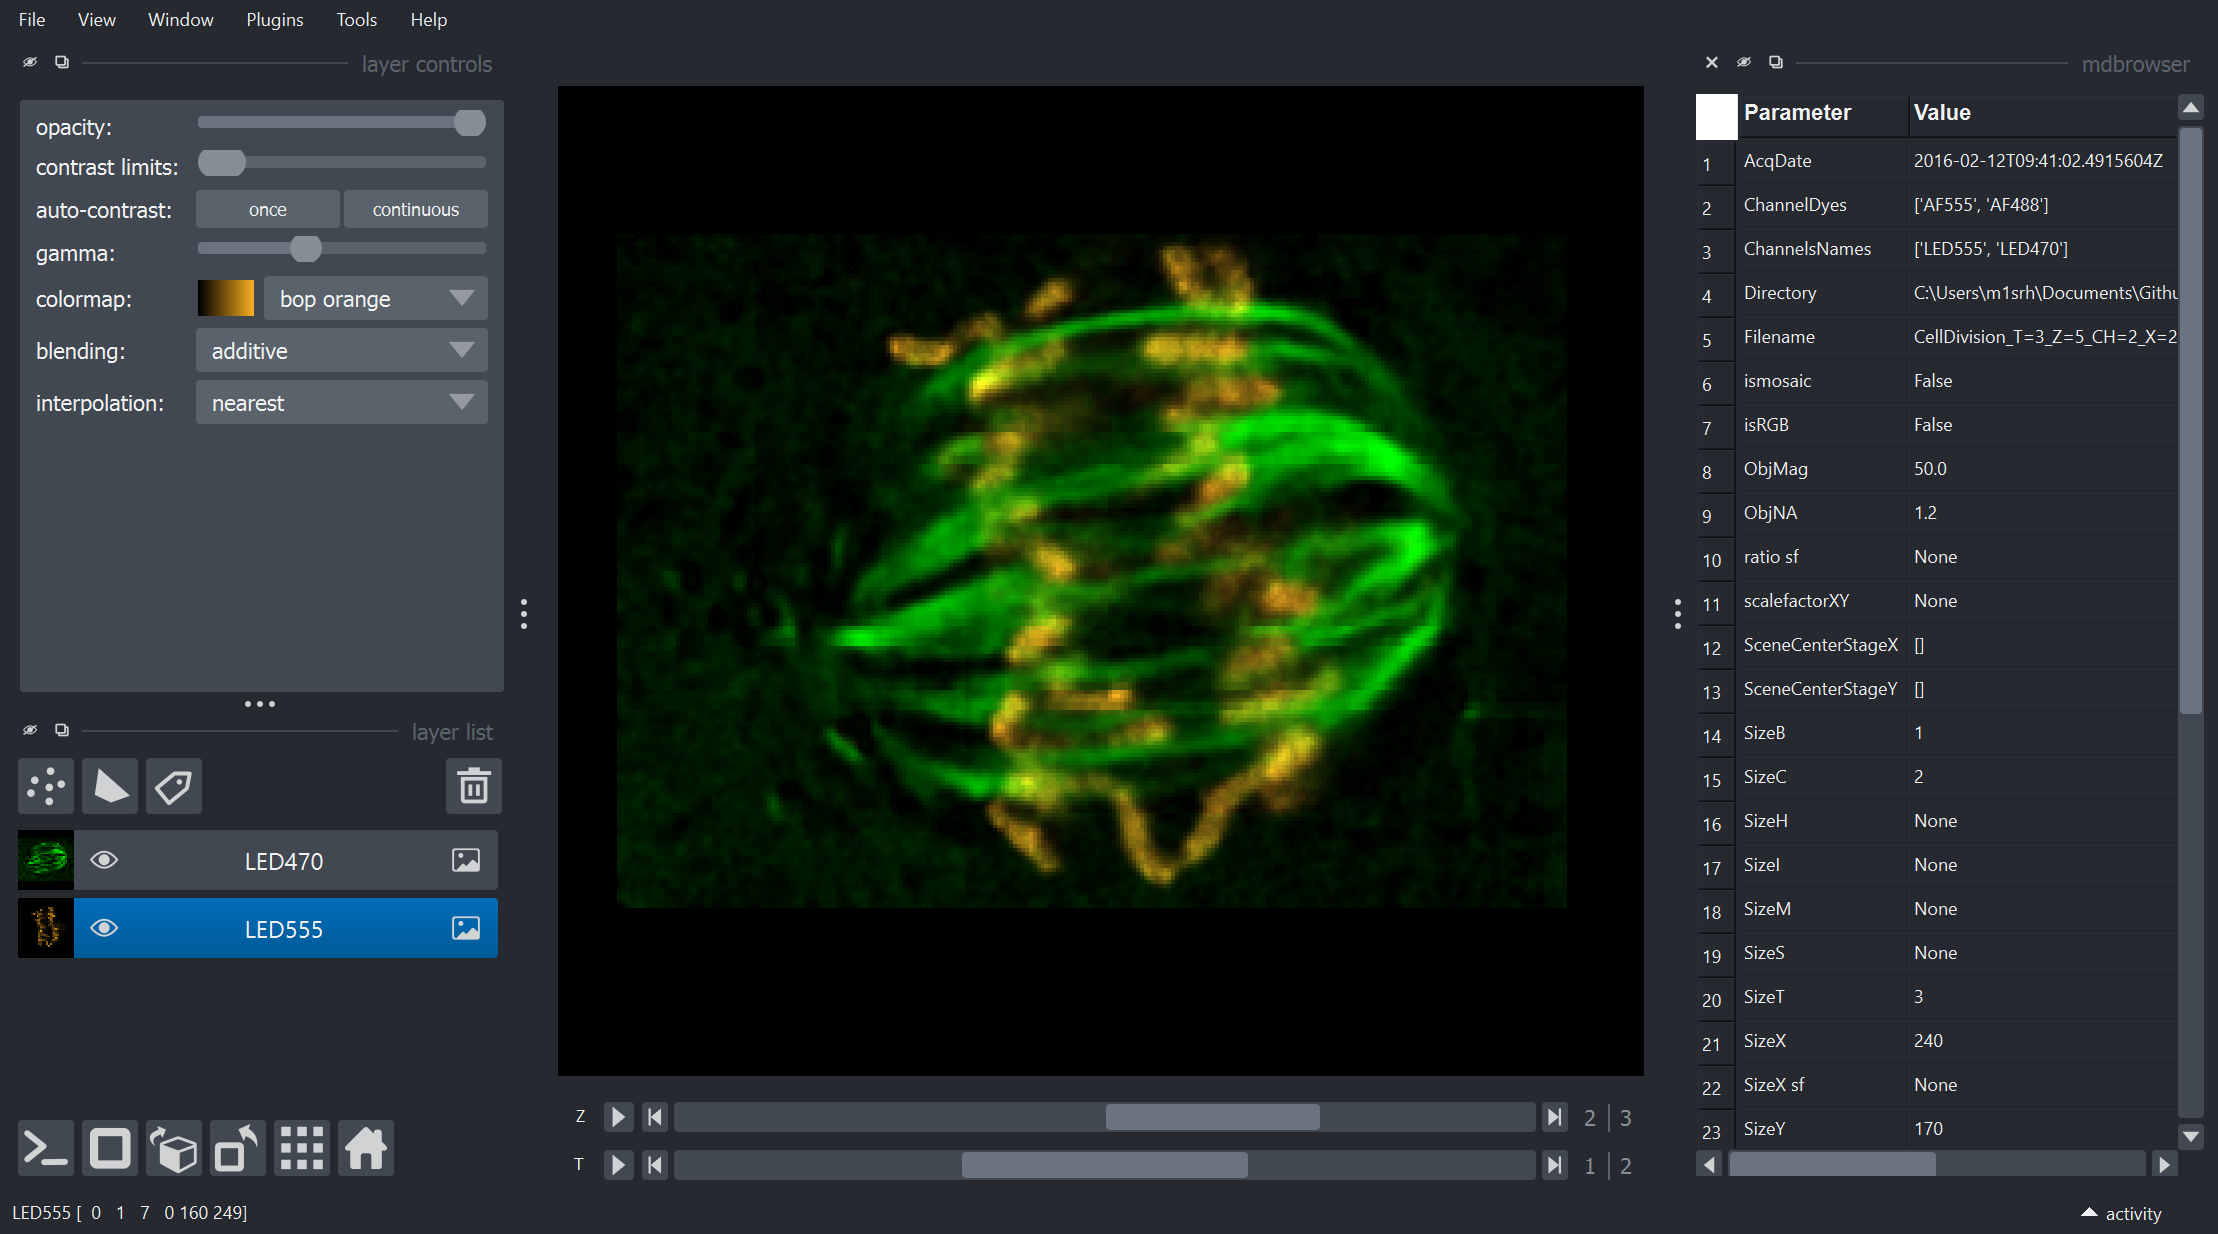

In [11]:
napari.utils.nbscreenshot(viewer)